## CAPSTONE PROJECT - PART 4 - EDA - HOUSEHOLDS ANALYSIS BEFORE FOCUS CAMP WAS LAUNCHED

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [3]:
households_beforeCamp18 = pd.read_csv('DATA_CLEAN/households_withDemographic_beforeCamp18.csv')

In [4]:
households_beforeCamp18

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,received_campA_18,redeemed_campA_18,zip_code,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,2.0,2.0,0.0,4.0,3.0,80.0,3.0,0.75,0.04,5,67,3362.46,333,9,Loyal,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,7,1,0,0.0,3.0,0.0,3.0,0.0,45.0,0.0,0.00,0.00,10,38,2320.50,223,7,Need attention,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,8,1,1,2.0,6.0,0.0,8.0,1.0,136.0,1.0,0.12,0.01,0,90,4113.90,434,11,Champions,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37211,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
3,13,1,1,2.0,4.0,0.0,6.0,11.0,82.0,11.0,1.83,0.13,0,207,10138.40,444,12,Champions,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,62946,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
4,16,1,0,1.0,1.0,0.0,2.0,0.0,32.0,0.0,0.00,0.00,4,92,1471.45,332,8,Need attention,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40241,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,0.0,1.0,0.0,1.0,0.0,19.0,0.0,0.00,0.00,14,26,1560.15,212,5,Required activation,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42301,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
797,2496,1,1,2.0,1.0,1.0,4.0,4.0,77.0,4.0,1.00,0.05,7,53,3610.50,224,8,Need attention,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,38401,45-54,A,75-99K,Homeowner,Unknown,3,1
798,2497,1,0,2.0,0.0,0.0,2.0,0.0,32.0,0.0,0.00,0.00,3,183,5619.49,344,11,Champions,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40211,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown
799,2498,1,0,2.0,2.0,1.0,5.0,0.0,65.0,0.0,0.00,0.00,1,130,2119.21,443,11,Champions,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,40241,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


In [5]:
# Calculate average values for each rfm group

rfm_level_agg = households_beforeCamp18.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

print(rfm_level_agg)

                    recency frequency monetary      
                       mean      mean     mean count
segment                                             
Champions               1.1     205.4   6414.8   343
Loyal                   4.3     109.6   3557.0   285
Need attention          8.8      66.9   2133.6   165
Required activation    13.9      32.9   1332.3     8


/Users/chautran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


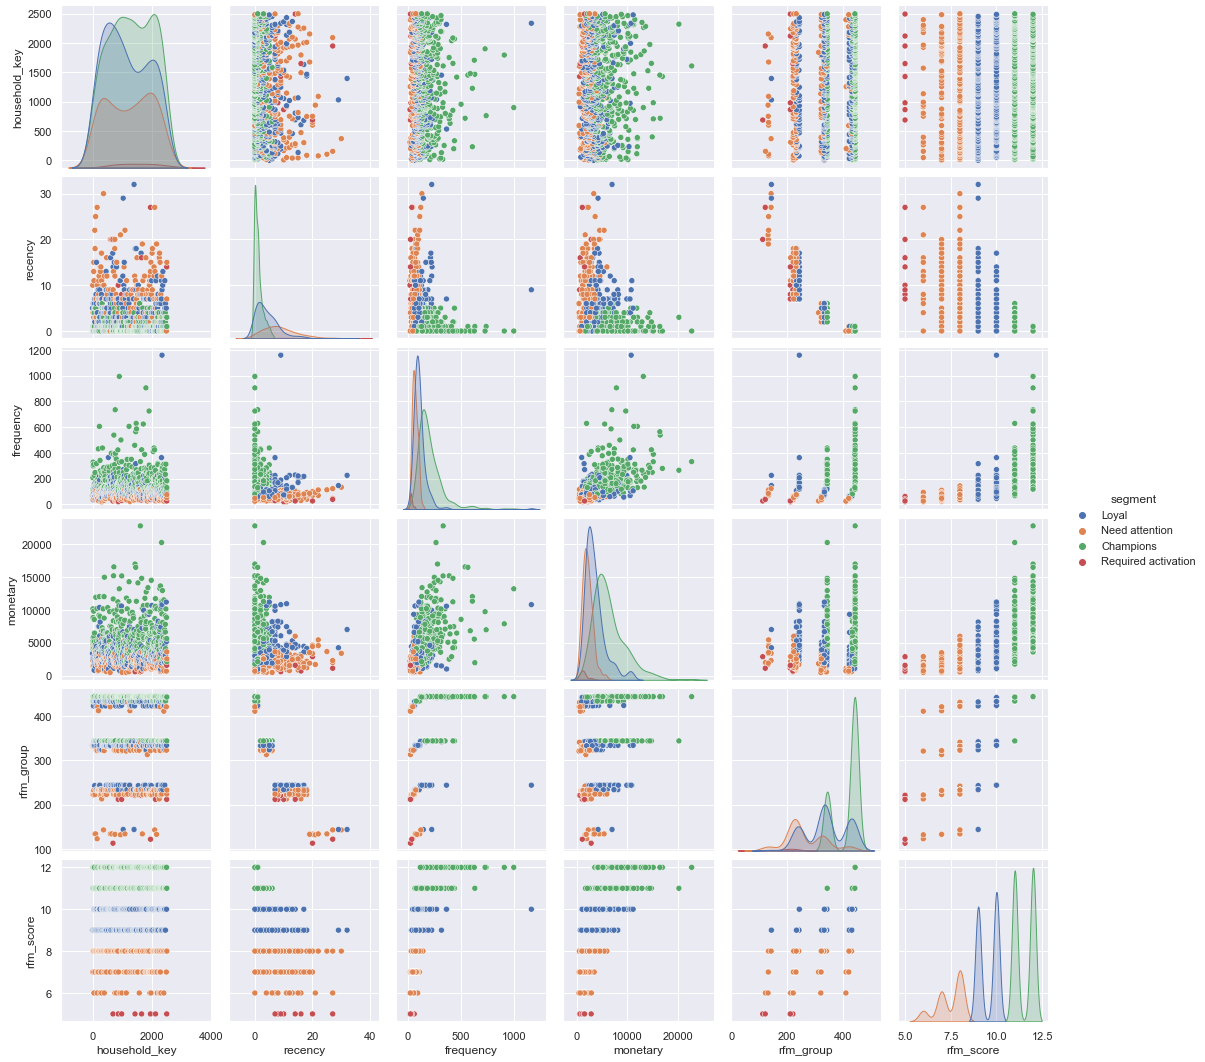

In [6]:
segnment = households_beforeCamp18[['household_key','recency','frequency','monetary','rfm_group','rfm_score','segment']]
sns.pairplot(data=segnment,hue='segment')

In [7]:
# get all numerical columns
numerical_dtypes = ['int16','int32', 'int64','float16','float32','float64']
num_cols = []
all_cols = [col for col in households_beforeCamp18.columns if not(col.startswith('camp'))]

for i in all_cols:
    if (households_beforeCamp18[i].dtype in numerical_dtypes):
        num_cols.append(i)
        
print(len(num_cols))
print(num_cols)

cat_cols = set(all_cols) - set(num_cols)
print(len(cat_cols))
print(cat_cols)

27
['household_key', 'received_campaign', 'redeemed_coupons', 'TypeA', 'TypeB', 'TypeC', 'total_campaigns_received', 'total_campaigns_engaged', 'total_coupons_received', 'total_coupons_redeemed', 'coupon_conversion_rate', 'recency', 'frequency', 'monetary', 'rfm_group', 'rfm_score', 'GROCERY_spend', 'DELI_spend', 'PRODUCE_spend', 'KIOSK-GAS_spend', 'DRUG GM_spend', 'NUTRITION_spend', 'SALAD BAR_spend', 'MEAT_spend', 'received_campA_18', 'redeemed_campA_18', 'zip_code']
8
{'household_size_desc', 'kid_category_desc', 'age_desc', 'segment', 'income_desc', 'marital_status_code', 'homeowner_desc', 'hh_comp_desc'}


In [8]:
# plot average monetary (lifetime value) of all numerical columns

def plot_multi_charts(data, x_column_list, y, title, y_label, plot_type, figsize):
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.8, wspace=0.4, top=0.96)
    fig.suptitle(title)

    for i, col in enumerate(list(data[x_column_list]),1):
        
        ax = fig.add_subplot(len(x_column_list), 3, i)
        
        if plot_type == 'scatter':
            plt.scatter(x=data[col], y=data[y])
            plt.xlabel('{}'.format(col), size=15,labelpad=12.5)
            plt.ylabel(y_label, size=15, labelpad=12.5)
        elif plot_type == 'bar':
            data.groupby(col).agg({y:'mean'}).sort_values(by=y,ascending=False).plot.bar(ax=ax)
        
        plt.xticks(rotation=90)
#     figname = title + '.png'
#     fig.savefig(figname,transparent=False, bbox_inches='tight', dpi=300)
   
    plt.xticks(rotation=45)
    plt.show()
    

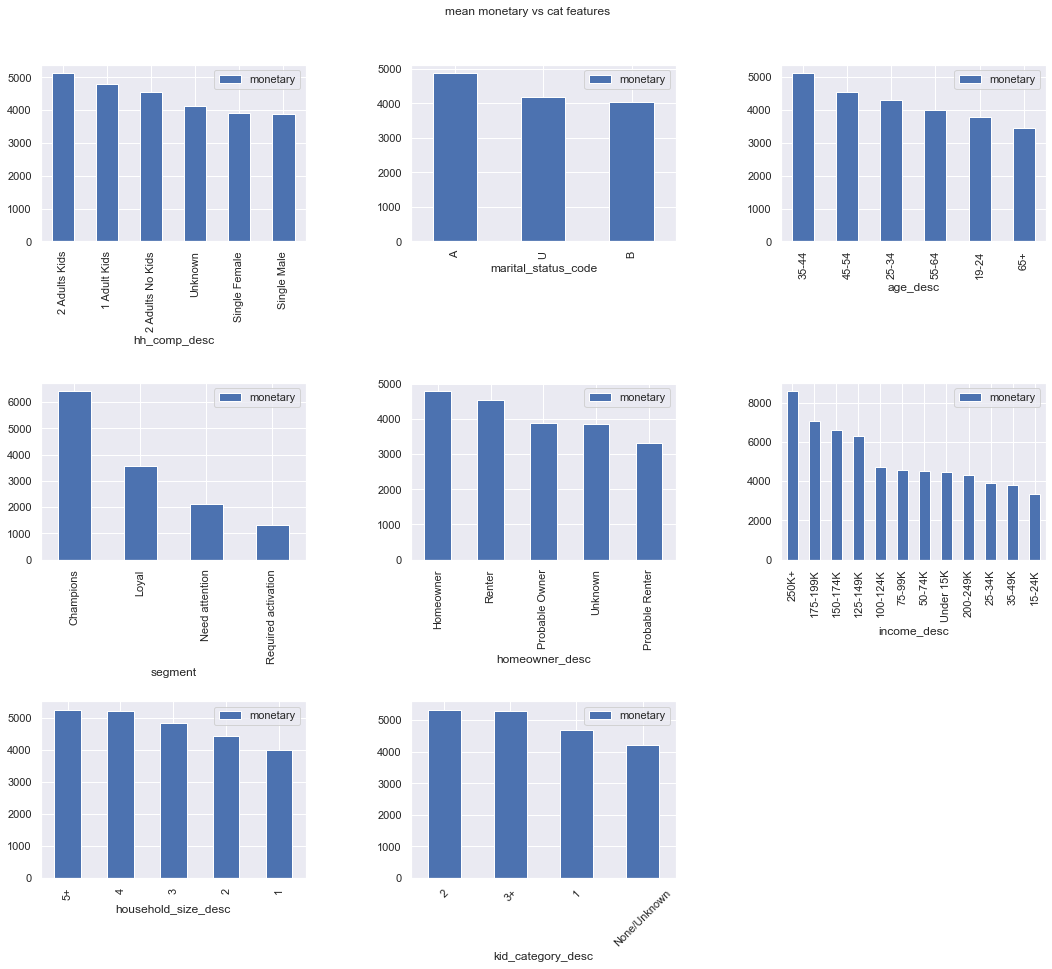

In [10]:
plot_multi_charts(data=households_beforeCamp18, x_column_list=cat_cols,y='monetary', 
                  title='mean monetary vs cat features',y_label='monetary',plot_type='bar',figsize=(18,40))    

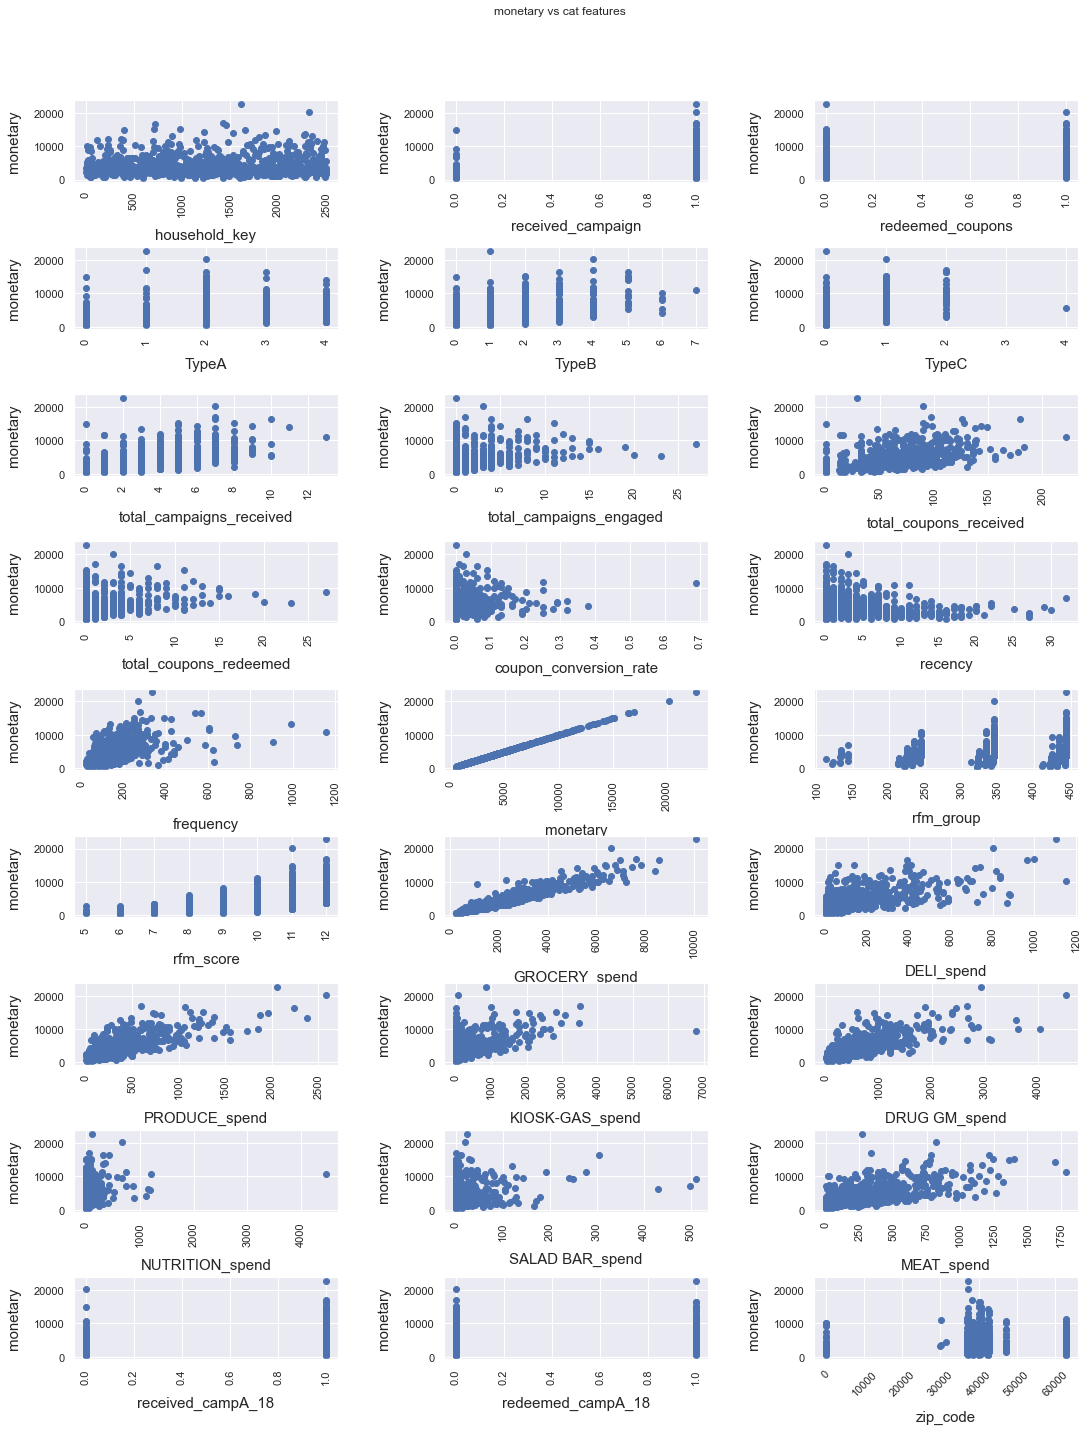

In [11]:
plot_multi_charts(data=households_beforeCamp18, x_column_list=num_cols,y='monetary', 
                  title='monetary vs cat features',y_label='monetary',plot_type='scatter',figsize=(18,65))    

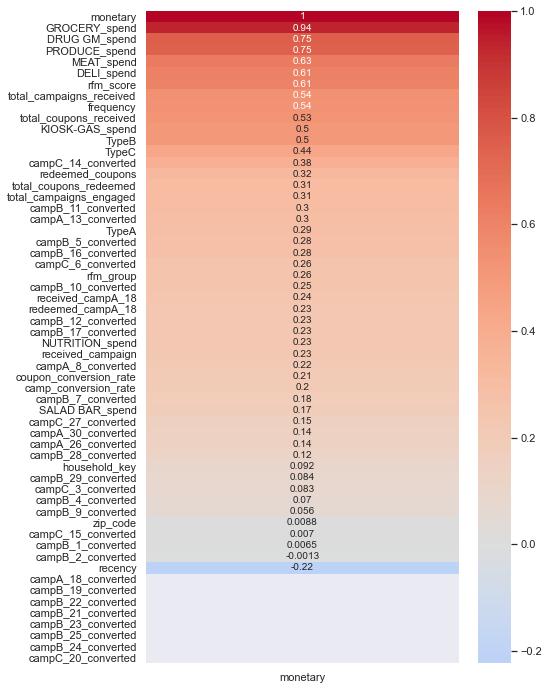

In [12]:
figure = plt.figure(figsize=(7,12))
sns.heatmap(households_beforeCamp18.corr()[['monetary']].sort_values('monetary',ascending=False),annot=True, cmap='coolwarm', center=0);


In [9]:
households = households_beforeCamp18

In [10]:
zipcode_profile = pd.read_excel('Kroger_Retail_Dunnhumby/MeanZIP-3.xlsx',sheet_name='nation')
zipcode_profile.rename(columns={'Zip':'zip_code'},inplace=True)
zipcode_profile.head()

,zip_code,Median,Mean,Pop
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [13]:
unique_zip = households_beforeCamp18.zip_code.unique()
zipcode_profile = zipcode_profile[zipcode_profile.zip_code.isin(unique_zip)]
zipcode_profile

,zip_code,Median,Mean,Pop
9302,30017,73972.6809,82663.6,20160
9329,30062,91855.5531,107138,62136
9834,31419,52206.0515,62233.1,50954
11584,36863,29224.5015,38425.4,11403
11642,37055,40203.7411,52492.6,27024
...,...,...,...,...
21341,62864,38155.2588,53302.7,24108
21376,62902,36325.6853,51953.3,4531
21410,62946,37022.5586,50017.5,12930
21412,62948,36373.0362,45577.6,12865


In [14]:
zipcode_profile['zipcode_segment'] = pd.qcut(zipcode_profile.Median,4,['LowIncome', 'MediumIncome','HighIncome','TopIncome'])
zipcode_profile

<ipython-input-14-d6ff60af1bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_profile['zipcode_segment'] = pd.qcut(zipcode_profile.Median,4,['LowIncome', 'MediumIncome','HighIncome','TopIncome'])


,zip_code,Median,Mean,Pop,zipcode_segment
9302,30017,73972.6809,82663.6,20160,TopIncome
9329,30062,91855.5531,107138,62136,TopIncome
9834,31419,52206.0515,62233.1,50954,HighIncome
11584,36863,29224.5015,38425.4,11403,LowIncome
11642,37055,40203.7411,52492.6,27024,MediumIncome
...,...,...,...,...,...
21341,62864,38155.2588,53302.7,24108,MediumIncome
21376,62902,36325.6853,51953.3,4531,MediumIncome
21410,62946,37022.5586,50017.5,12930,MediumIncome
21412,62948,36373.0362,45577.6,12865,MediumIncome


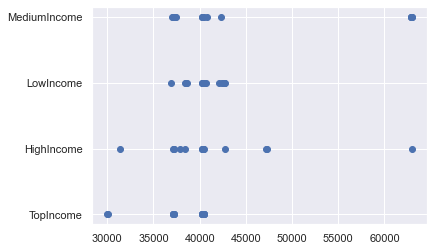

In [19]:
plt.scatter(zipcode_profile.zip_code,zipcode_profile.zipcode_segment)

In [21]:
households = households.merge(zipcode_profile[['zip_code','zipcode_segment']],on='zip_code')
households

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,received_campA_18,redeemed_campA_18,zip_code,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,zipcode_segment
0,7,1,0,0.0,3.0,0.0,3.0,0.0,45.0,0.0,0.00,0.00,10,38,2320.50,223,7,Need attention,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
1,304,1,0,3.0,2.0,1.0,6.0,0.0,99.0,0.0,0.00,0.00,4,246,6831.32,344,11,Champions,3324.53,80.50,200.04,1040.46,1043.69,20.47,3.19,367.96,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,40243,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,TopIncome
2,353,1,1,2.0,0.0,0.0,2.0,1.0,32.0,1.0,0.50,0.03,0,94,2560.58,433,10,Loyal,1070.75,61.26,341.70,0.00,261.97,64.65,4.24,258.99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,40243,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
3,732,1,0,2.0,4.0,0.0,6.0,0.0,108.0,0.0,0.00,0.00,6,85,3092.49,333,9,Loyal,2116.02,44.50,270.88,144.86,30.93,62.57,0.48,145.85,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,55-64,A,75-99K,Homeowner,2 Adults Kids,4,2,TopIncome
4,766,1,1,2.0,4.0,2.0,8.0,1.0,136.0,1.0,0.12,0.01,0,101,6849.43,434,11,Champions,3383.25,290.07,1555.26,0.00,698.77,51.17,18.08,462.19,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,40243,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1762,1,1,2.0,2.0,1.0,5.0,3.0,82.0,3.0,0.60,0.04,0,268,11753.52,444,12,Champions,5371.84,124.21,704.64,2983.37,1395.56,3.39,31.66,329.86,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,37188,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+,TopIncome
769,1804,1,0,2.0,2.0,0.0,4.0,0.0,58.0,0.0,0.00,0.00,0,252,8193.88,444,12,Champions,2951.96,140.27,553.36,1394.21,1996.40,6.69,0.00,518.44,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37188,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
770,1834,1,0,2.0,1.0,0.0,3.0,0.0,43.0,0.0,0.00,0.00,1,130,3647.61,444,12,Champions,2189.94,303.82,157.88,247.90,232.98,0.00,0.00,159.48,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36863,45-54,U,125-149K,Homeowner,Unknown,5+,3+,LowIncome
771,1948,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,57,1043.52,322,7,Need attention,677.34,0.00,101.13,0.00,62.76,30.95,2.91,32.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37918,35-44,U,50-74K,Homeowner,Single Female,1,None/Unknown,HighIncome


In [24]:
households.query('zip_code!=0')

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,received_campA_18,redeemed_campA_18,zip_code,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,zipcode_segment
0,7,1,0,0.0,3.0,0.0,3.0,0.0,45.0,0.0,0.00,0.00,10,38,2320.50,223,7,Need attention,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
1,304,1,0,3.0,2.0,1.0,6.0,0.0,99.0,0.0,0.00,0.00,4,246,6831.32,344,11,Champions,3324.53,80.50,200.04,1040.46,1043.69,20.47,3.19,367.96,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,40243,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,TopIncome
2,353,1,1,2.0,0.0,0.0,2.0,1.0,32.0,1.0,0.50,0.03,0,94,2560.58,433,10,Loyal,1070.75,61.26,341.70,0.00,261.97,64.65,4.24,258.99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,40243,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
3,732,1,0,2.0,4.0,0.0,6.0,0.0,108.0,0.0,0.00,0.00,6,85,3092.49,333,9,Loyal,2116.02,44.50,270.88,144.86,30.93,62.57,0.48,145.85,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,55-64,A,75-99K,Homeowner,2 Adults Kids,4,2,TopIncome
4,766,1,1,2.0,4.0,2.0,8.0,1.0,136.0,1.0,0.12,0.01,0,101,6849.43,434,11,Champions,3383.25,290.07,1555.26,0.00,698.77,51.17,18.08,462.19,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,40243,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1762,1,1,2.0,2.0,1.0,5.0,3.0,82.0,3.0,0.60,0.04,0,268,11753.52,444,12,Champions,5371.84,124.21,704.64,2983.37,1395.56,3.39,31.66,329.86,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,37188,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+,TopIncome
769,1804,1,0,2.0,2.0,0.0,4.0,0.0,58.0,0.0,0.00,0.00,0,252,8193.88,444,12,Champions,2951.96,140.27,553.36,1394.21,1996.40,6.69,0.00,518.44,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37188,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,TopIncome
770,1834,1,0,2.0,1.0,0.0,3.0,0.0,43.0,0.0,0.00,0.00,1,130,3647.61,444,12,Champions,2189.94,303.82,157.88,247.90,232.98,0.00,0.00,159.48,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,36863,45-54,U,125-149K,Homeowner,Unknown,5+,3+,LowIncome
771,1948,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2,57,1043.52,322,7,Need attention,677.34,0.00,101.13,0.00,62.76,30.95,2.91,32.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37918,35-44,U,50-74K,Homeowner,Single Female,1,None/Unknown,HighIncome


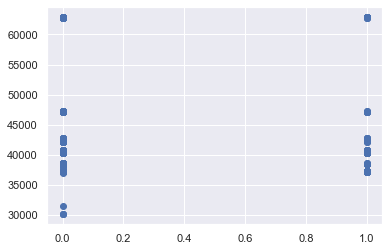

In [31]:
# received_campA_18 redeemed_campA_18

plt.scatter(households.redeemed_campA_18, households.zip_code)



In [49]:
hh_redeem = households.query('redeemed_campA_18==1').sort_values('zip_code')
print(hh_redeem.zip_code.unique())
print(hh_redeem.Median.describe())
print(hh_redeem.Pop.describe())

[37055 37064 37130 37188 37204 37206 37211 37215 37216 37218 37324 38401
 38501 38583 40203 40206 40213 40216 40219 40241 40243 40245 40330 40342
 40356 40475 40502 40503 40504 40505 40509 40515 40701 42101 42301 42367
 42501 42633 42642 42701 42718 47150 47250 62832 62864 62946 62959]
count      162.000000
mean     44911.207674
std      15616.176905
min      16629.001000
25%      35196.600800
50%      43303.498800
75%      47176.544300
max      96423.441600
Name: Median, dtype: float64
count      162.000000
mean     31494.074074
std      18222.252877
min        667.000000
25%      19694.000000
50%      26948.000000
75%      42440.000000
max      74755.000000
Name: Pop, dtype: float64


In [50]:
hh_not_redeem = households.query('redeemed_campA_18==0').sort_values('zip_code')
print(hh_not_redeem.zip_code.unique())
print(hh_not_redeem.Median.describe())
print(hh_not_redeem.Pop.describe())

[30017 30062 31419 36863 37055 37064 37067 37087 37130 37167 37188 37204
 37206 37211 37215 37216 37218 37324 37388 37918 38401 38464 38501 38583
 40203 40205 40206 40211 40213 40216 40219 40241 40243 40245 40330 40342
 40351 40356 40475 40502 40503 40504 40505 40509 40515 40701 40741 42101
 42301 42367 42501 42633 42642 42653 42701 42718 47150 47250 62832 62864
 62902 62946 62948 62959]
count      611.000000
mean     45795.140213
std      16407.285111
min      16629.001000
25%      35094.000000
50%      40891.235900
75%      52153.226700
max      96423.441600
Name: Median, dtype: float64
count      611.000000
mean     30190.805237
std      16821.974917
min        667.000000
25%      19514.000000
50%      26040.000000
75%      38032.000000
max      74755.000000
Name: Pop, dtype: float64


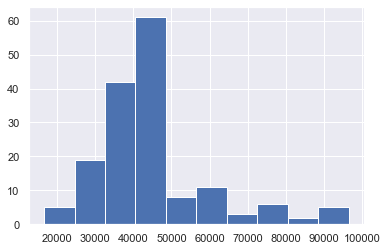

In [43]:
plt.hist(hh_redeem.Median)
plt.show()

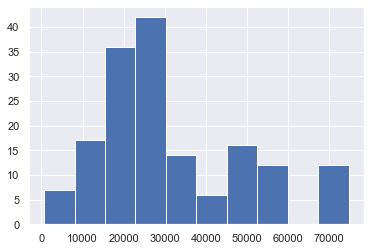

In [44]:
plt.hist(hh_redeem.Pop)
plt.show()

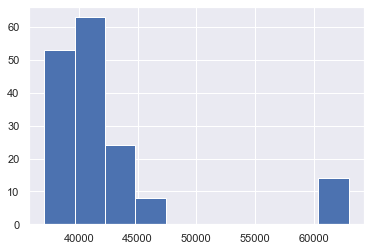

In [42]:
plt.hist(hh_redeem.zip_code)
plt.show()

In [22]:
zipcode_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 9302 to 21422
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zip     64 non-null     int64  
 1   Median  64 non-null     float64
 2   Mean    64 non-null     object 
 3   Pop     64 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB


In [15]:
zipcode_profile.describe()

,Zip,Median,Pop
count,64.000000,64.000000,64.000000
mean,41577.687500,47059.337447,27827.687500
std,7526.407083,18163.676015,15507.918348
min,30017.000000,16629.001000,667.000000
25%,37217.500000,35170.950600,18610.750000
50%,40242.000000,41196.446950,23966.500000
75%,42151.000000,55609.890375,37023.250000
max,62959.000000,96423.441600,74755.000000


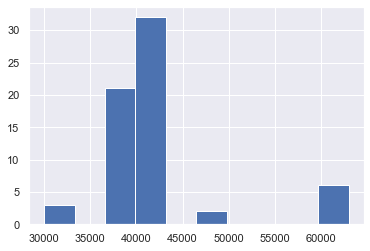

In [21]:
plt.hist(zipcode_profile.Zip)
plt.show()

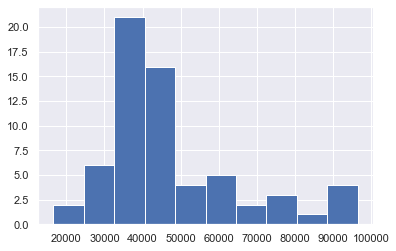

In [19]:
plt.hist(zipcode_profile.Median)
plt.show()

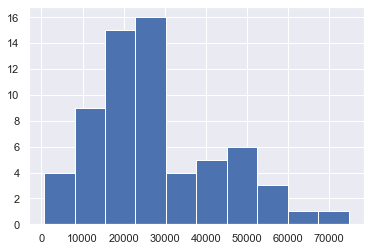

In [20]:
plt.hist(zipcode_profile.Pop)
plt.show()

In [58]:
households[['household_key','age_desc','marital_status_code','income_desc','homeowner_desc','hh_comp_desc','household_size_desc',
            'kid_category_desc','rfm_group','segment']].head(5)

,household_key,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,rfm_group,segment
0,7,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,223,Need attention
1,304,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown,344,Champions
2,353,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,433,Loyal
3,732,55-64,A,75-99K,Homeowner,2 Adults Kids,4,2,333,Loyal
4,766,45-54,A,150-174K,Homeowner,2 Adults No Kids,2,None/Unknown,434,Champions
